## Ensemble Learning

#### Overview

Ensemble Learning introduces us to systems of ML models working together to achieve an output. A group of predictors is called an ensemble. 

On the television show “who wants to be a millionaire” the candidate has a life line to to ask the audience for help. The wisdom of the crowd can often lead to better success.



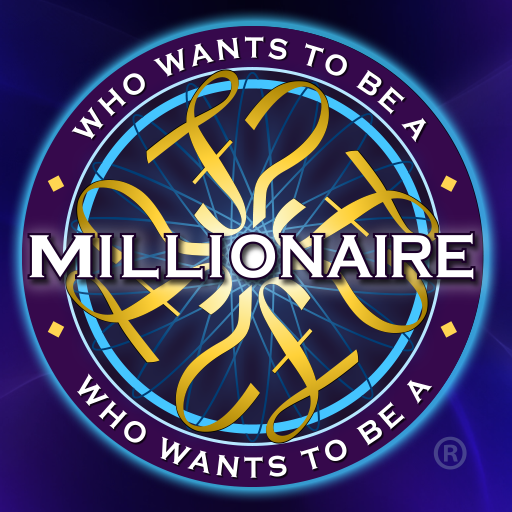

To thought, immediately we know that they are not always right. This emphasizes that the individuals making up the audience must be knowledgeable in that area to increase the probability of success. In our case, the individual machine learning models are the audience. The ensemble of machine learning models (audience) will undergo a majority voting to determine what the correct value or class.

Random Forest is an example of an Ensemble method. Random Forest is made up of several Decision Tree's trained on different subsets of training data. All of the predictions are averaged (Regression tasks) or the majority vote (classification tasks) is taken. This can significantly increase the performance of your model.

I regulary assume model is like a person making a decision. Each person is effectively trained on different experiences. Individuals with better experience may be more credible.

This section will include information on bagging, bosting, and stacking ensemble techniques.

#### Contents


#### Key Points
<br>


#### What is the difference between Hard and Soft Voting?

As mentioned in the Who Wants to Be Millionaire example, sometimes the wisdom of the crowd can give you the best answer. Now when we have several predictions we can take the majority vote, this is called hard voting. <br>

Sometimes we use models that can output probabilities (it's confidence). Instead of taking the majority vote we can take the class with the highest probability averaged over all the individual classifiers. 

#### Can you explain the Law of Large Numbers and it's Significance to Hard Voting ?

You have a bias coin that has a 51 % chance for heads. If you flip the coin a few times, that probability is less noticable. The Law of Large Numbers tells us that over a large number of samples (as n approaches infinity) the probability will converge to it's expected value. So if we have 10,000 flips we would expect 5,100 heads and 4900 tails. 

note that the probability of the other class doesn't start to increase over consecutive flips. See this video for clarity <br>

Law of Large Numbers - https://www.youtube.com/watch?v=VpuN8vCQ--M

Therefore if we have many machine learning models that are over 51% percent precise/accurate the overall prediction is more likely to be correct.

In reality this is only true if each model is <b> perfectly independant </b>. We wouldn't just duplicate the same model or have a 100 similar models. They aren't independant since they are all trained on the same data and would make similar errors. One way to minimize this is to ensure each one is trained on different algorithms (and even different data).

The key to a succesful Ensemble tends to be diversity

Now we will look an coded example of: <br>
Voting Classifier 
- Hard Voting
- Soft Voting 

Followed by theory and a coded example of: <br>
Bagging and Pasting (This technique uses soft voting at default which can be changed)
- Trained on different data without replacement
- Trained on different data with replacement


 #### 1. Create a Voting Classifier 

#### Import Relevant modules

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### Initiate Models

In [14]:
log_clf = LogisticRegression(random_state = 42, solver = 'lbfgs')
rnd_clf = RandomForestClassifier(random_state = 42, n_estimators = 100)
svm_clf = SVC(gamma = 'scale')

#### Import Data
For this example the making moons dataset was used. This makes two interleaving half circles.
A simple toy dataset to visualize clustering and classification algorithms.

We aren't really thinking about the context of the data or problem statement. Only that we want to see if the prediction of a voting clf vs it's individual components.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf),('svc', svm_clf)],
    voting='hard') 

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                            

In [17]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


2. Creating a Voting Classifier (Soft Voting)

If we want to average the confidence of our models instead, then we have to ensure each model has a predict probability method. SVC needs the hyperparemeter probability to be set to True. In addition we must change hard to soft in the voting hyperparameter.

The SVC Hyperparameter Probability = True will cause Tcross validation to estimate probabilities and slow down the training process. However, we did recieve a higher accuracy !

In [18]:
log_clf = LogisticRegression(random_state = 42, solver = 'lbfgs')
rnd_clf = RandomForestClassifier(random_state = 42, n_estimators = 100)
svm_clf = SVC(random_state = 42,probability= True, gamma = 'scale')

In [19]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf),('svc', svm_clf)],
    voting='soft') 


for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


92% with Soft Voting!

#### 3. Bagging  (Bootstrap) and Pasting

Earlier we used different algorithms. A set number of steps to solve a problem. Usually in Machine Learning it is an optimisation problem where we are trying to minimize a cost function.<br>

Anyway more importantly, Instead of using different algorithms we could use the same algorithm trained on different sets of data.

There is two different ways we can train the same algorithm on different sets of data: <br>
<b> Bagging (Bootstrap)- With Replacement </b> <br>
<b> Pasting - Without Replacement </b>

Your group of friends have similar experiences tp you. This means they are likely to have similar interpretations to situations too. This is the same as <b> Bagging </b>. The same data (experiences) may be present in more than one model.  <br>

Whereas <b> Pasting </b> is without replacement. People outside of your friend group are likely to have more unique experiences to youself as compared to your close friends. There is a chance they have had the same or similar experiences in their own time. However, their is more diversity between your experiences. In data terms, if you had 50 rows of data (50 experiences noted down) and 2 models (2 people), then you have shared out 25 rows between each model. <br>

<b> What is the effect of Bagging and Pasting on Bias and Variance ? </b> 

According to the book:

Each individual predictor has a higher bias compared to training on the full original training set. However, the aggreagation reduces both bias and variance. Overall you are likely to expect similar bias but less variance (helping with overfitting).

CHECK THIS!!

Bootstrapping introduces abit more diversity in the subsets compared to pasting . This means it usually has slightly more bias but this means each predictor is less correlated and leads to less variance. I think it's important to experiment this and it highly depends on the nature of the dataset you are working with.

<b> Why is Bagging and Pasting Scalable? </b> 

Predictors can all be trained in parallel via different CPU Cores or even different servers.

#### 3. Create a Bagging Classifier

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),random_state = 42 , n_estimators = 500,
    max_samples=100,bootstrap=True,n_jobs = -1)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [29]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.904

#### 3. Create a Pasting Classifier
All we needed to change was bootstrap to equal False

In [32]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),random_state = 42, n_estimators = 500,
    max_samples=100,bootstrap=False,n_jobs = -1) #n_jobs tells scikit learn how many cores to use, -1 means use all available cores

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [33]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

#### Out-of-Bag Evaluation

When we use Bagging, some instances (rows of data) are used more than once and other's aren't used <b> at all! </b><br>

The instances that haven't been used at all by any predictor can be used to evaluate the model's performance.To obtain the oob score we simply set the oob_score argument to True. 




In [34]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),random_state = 42 , n_estimators = 500,
    max_samples=100,bootstrap=True,n_jobs = -1, oob_score = True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [35]:
bag_clf.oob_score_

0.9253333333333333

This means we expect a similar prediction on the test set

In [36]:
accuracy_score(y_test, y_pred)

0.912

Success!

We can access the confidences too through the decision function 

In [37]:
bag_clf.oob_decision_function_

array([[0.35849057, 0.64150943],
       [0.43513514, 0.56486486],
       [1.        , 0.        ],
       [0.0128866 , 0.9871134 ],
       [0.03174603, 0.96825397],
       [0.07928389, 0.92071611],
       [0.4027027 , 0.5972973 ],
       [0.06703911, 0.93296089],
       [0.92950392, 0.07049608],
       [0.88461538, 0.11538462],
       [0.59351621, 0.40648379],
       [0.04896907, 0.95103093],
       [0.7591623 , 0.2408377 ],
       [0.82908163, 0.17091837],
       [0.88279302, 0.11720698],
       [0.07407407, 0.92592593],
       [0.04488778, 0.95511222],
       [0.92307692, 0.07692308],
       [0.70737913, 0.29262087],
       [0.94358974, 0.05641026],
       [0.06366048, 0.93633952],
       [0.22933333, 0.77066667],
       [0.91002571, 0.08997429],
       [0.98746867, 0.01253133],
       [0.96236559, 0.03763441],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.02933333, 0.97066667],
       [0.70454545, 0.29545455],
       [0.

#### Summary so far

The concept of a voting predictor is present among all the models we've seen today. Either the predictions are averaged or the majority result is taken. <br>

We can either use different algorithms or train the many of the same algorithm on different subsets of the data. This makes each model more independant helping the desired effect as seen in the Law of Large Numbers. 

Each predictor trained on different subsets of data can either be done with replacement (Bagging) or without replacement (Pasting).

CHECKKKK

We have reduced/similar Bias and reduced variance on the final ensemble when using such techniques. This could help combat overfitting.

For Bagging, we can use the out of bag instances to evaluate the model as opposed to cross validation.

#### Random Patches and Random Subspaces

We can also vary the features selected among predictors. 

This is a great way to increase diversity, have some models that overthink, underthink and most importantly think differently.

Random Patches is when we use Bagging and sample features across predictors.
Random Subspace is when we use Pasting and sampling features. (bootstrap = False, max_samples = 1, bootstrap_features = True and max_features < 1).

This is great for high dimensional datasets. It trades some bias for variance once again.

#### Random Forests
Random Forest are an ensemble of many decision trees (defaults to 100 trees). Instead of Bagging or Pasting, the random forest class can be used. It includes all the hyperparmeters as decision trees and of a DecisionTreeClassifier. This Random Forest includes extra randomness when growing trees. Instead of searching for the very best feature when splitting nodes, it searches for the best feature among a random subset of features. The algorithm results in greater tree diversity.

<br>

Feature Importance from Random Forest can prove to be very useful. It has measured the relative importance of each feature.<br>

Scikit Learn measures a features importance by looking at how much the tree nodes that use that feature reduce impurity on average. More precisely, it is a weighted averaged where each node's weight is equal to the number of training samples that are associated with it.

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rnd_clf.fit(iris["data"], iris["target"])

for name,score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.09554587899892654
sepal width (cm) 0.023481396729853332
petal length (cm) 0.4206293560955912
petal width (cm) 0.46034336817562893
